In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
!pip install monai
!pip install -U scikit-image
!pip install SimpleITK
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 105.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 13.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 16.2 MB/s eta 0:00:00


In [3]:
!pip install sahi 
!pip install yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 12.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=f15a65b9c593b69417594494d48670a97f10a1ebcb6e7de1af226d1d6d26a8a7
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.3/956.3 kB 23.5 MB/s eta 0:00:00
     ━━

In [1]:
import sys
import os
py_file_location = "/content/drive/MyDrive/voting_updated/engine"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/drive/MyDrive/voting_updated/models"
sys.path.append(os.path.abspath(py_file_location))

In [2]:
# !pip install ipyvolume
# import ipyvolume as ipv
import torch
import numpy as np
import torch
# !pip install monai
import monai.losses
from monai.transforms import (Resize,EnsureChannelFirst, Compose)
from engine import set_seed
import SimpleITK as sitk
from axial_2d import AxialSegmentation2D
from sagittal_2d import SagittalSegmentation2D
from coronal_2d import CoronalSegmentation2D
from views_segmentation import ViewSegmentation
from monai.transforms import Resize
from utils import nii2png_XYZ
import shutil
set_seed()

In [ ]:
worst = ['Copy of volume-31.nii', 'Copy of volume-35.nii', 'Copy of volume-40.nii', 'Copy of volume-43.nii', 'Copy of volume-44.nii', 'Copy of volume-71.nii', 'Copy of volume-72.nii', 'Copy of volume-74.nii', 'Copy of volume-75.nii', 'Copy of volume-89.nii', 'Copy of volume-129.nii']
voting_techniuqe = ViewSegmentation()
volume_nii_path = "/content/drive/MyDrive/LITs/Train/volume/Copy of volume-129.nii"
voting_techniuqe.slice(volume_nii_path)
volume_3d = voting_techniuqe.get_segmentation()
voting_techniuqe.delete_temp_slices()



Used Device:  cuda
Used Device:  cuda
Used Device:  cuda


In [ ]:


img_vol = sitk.ReadImage(volume_nii_path)
img_vol_array = sitk.GetArrayFromImage(img_vol)

mask_path = "/content/drive/MyDrive/LITs/Train/mask/Copy of segmentation-129.nii"
img_mask = sitk.ReadImage(mask_path)
img_mask_array = sitk.GetArrayFromImage(img_mask)
print(img_mask_array.shape)
mask_tensor = torch.from_numpy(img_mask_array)
mask_tensor[mask_tensor > 1] = 1  # ignore the lesions

(338, 512, 512)


-1024
1639


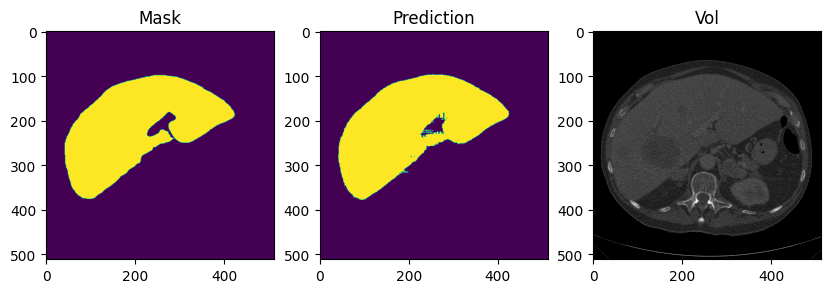

In [ ]:
# Choose the slices to display
import matplotlib.pyplot as plt
slice = 200

# Extract the 2D slices from the volumes
img_mask_array[img_mask_array > 1] = 1 

slice_2d_1 = img_mask_array[slice,:,:]
slice_2d_2 = volume_3d[slice,:,:]

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# Display the first slice using the first subplot
ax1.imshow(slice_2d_1)
ax1.set_title('Mask')

# Display the second slice using the second subplot
ax2.imshow(slice_2d_2)
ax2.set_title('Prediction')
# Display the second slice using the second subplot
vmin = img_vol_array.min()
print(vmin)
vmax = img_vol_array.max()
print(vmax)

ax3.imshow(img_vol_array[slice,:,:], vmin = -300, vmax = 1200, cmap = "gray")
ax3.set_title('Vol')

# Show the figure
plt.show()

In [ ]:
import natsort

volume_folders = natsort.natsorted(
      os.listdir("/content/drive/MyDrive/LITs/Test/volume"))  # sort the directory of files
mask_folders = natsort.natsorted(
        os.listdir("/content/drive/MyDrive/LITs/Test/mask"))

voting_techniuqe = ViewSegmentation()
dice_loss = monai.losses.DiceLoss(include_background=True)
dice_metric = monai.metrics.DiceMetric()
Metrics = []
losses = []
volume_path = "/content/drive/MyDrive/LITs/Test/volume"
mask_path = "/content/drive/MyDrive/LITs/Test/mask"
for i in range(len(volume_folders)):
  dice_metric.reset()
  print(volume_folders[i])
  volume_nii_path = os.path.join(volume_path, volume_folders[i])
  voting_techniuqe.slice(volume_nii_path)
  volume_3d = voting_techniuqe.get_segmentation()
  voting_techniuqe.delete_temp_slices()

  mask_nii_path = os.path.join(mask_path, mask_folders[i])
  img_mask = sitk.ReadImage(mask_nii_path)
  img_mask_array = sitk.GetArrayFromImage(img_mask)
  mask_tensor = torch.from_numpy(img_mask_array.astype(np.float32))
  mask_tensor[mask_tensor > 1] = 1  # ignore the lesions
  loss = dice_loss(volume_3d, mask_tensor)
  dice_metric(y_pred=volume_3d, y=mask_tensor)
  metric = dice_metric.aggregate().item()

  # dice_score=dice_metric(volume_3d, mask_tensor)[0].item()
  print(metric)
  print(loss.item())
  losses.append(loss.item())
  Metrics.append(metric)



Copy of volume-10.nii
axial is loaded 


/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)


0.9139971733093262
0.013077590614557266
Copy of volume-20.nii
axial is loaded 
0.9165287017822266
0.027140356600284576
Copy of volume-24.nii
axial is loaded 
0.9008419513702393
0.016787584871053696
Copy of volume-28.nii
axial is loaded 
0.9203031659126282
0.0209316648542881
Copy of volume-34.nii
axial is loaded 
0.6863042116165161
0.1000782921910286
Copy of volume-36.nii
axial is loaded 
0.8854044079780579
0.021509535610675812
Copy of volume-45.nii
axial is loaded 
0.8980234265327454
0.032770685851573944
Copy of volume-59.nii
axial is loaded 
0.9277228713035583
0.010668396018445492
Copy of volume-60.nii
axial is loaded 
0.8918922543525696
0.014389474876224995
Copy of volume-61.nii
axial is loaded 
0.8971138000488281
0.017660019919276237
Copy of volume-62.nii
axial is loaded 
0.9306070804595947
0.008341136388480663
Copy of volume-63.nii
axial is loaded 
0.9157587289810181
0.012707873247563839
Copy of volume-64.nii
axial is loaded 
0.9240309000015259
0.01307283341884613
Copy of volume-65

In [4]:
print(np.mean(losses))
print(np.mean(Metrics))
print(losses)

0.02914921846240759
0.8494889356195927
[0.16458572447299957, 0.027140356600284576, 0.016787584871053696, 0.0209316648542881, 0.1000782921910286, 0.021509535610675812, 0.032770685851573944, 0.010668396018445492, 0.014389474876224995, 0.017660019919276237, 0.008341136388480663, 0.012707873247563839, 0.01307283341884613, 0.012721068225800991, 0.02493312768638134, 0.04295893386006355, 0.015243018046021461, 0.005433958955109119, 0.009762744419276714, 0.011287939734756947]


In [ ]:
worst_cases = [volume_folders[i] for i, x in enumerate(losses) if x > 0.02]
print(worst_cases)
print(len(worst_cases))

['Copy of volume-31.nii', 'Copy of volume-35.nii', 'Copy of volume-40.nii', 'Copy of volume-43.nii', 'Copy of volume-44.nii', 'Copy of volume-71.nii', 'Copy of volume-72.nii', 'Copy of volume-74.nii', 'Copy of volume-75.nii', 'Copy of volume-89.nii', 'Copy of volume-129.nii']
11
